In [1]:
import numpy as np 
import pandas as pd
data = pd.read_csv("/kaggle/input/rainfall-prediction-data/austin_weather.csv")
data

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,


In [5]:
data=data.drop(["Events","Date","SeaLevelPressureAvgInches"],axis = 1)
data=data.replace('T',0.0)
data=data.replace('-',0.0)
data

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.86,29.59,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.41,29.87,10,10,5,16,6,25,0
2,58,45,32,31,27,23,76,52,27,30.56,30.41,10,10,10,8,3,12,0
3,61,46,31,36,28,21,89,56,22,30.56,30.3,10,10,7,12,4,20,0
4,58,50,41,44,40,36,86,71,56,30.41,30.27,10,10,7,10,2,16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,103,89,75,71,67,61,82,54,25,30.04,29.88,10,10,10,12,5,21,0
1315,105,91,76,71,64,55,87,54,20,29.97,29.81,10,10,10,14,5,20,0
1316,107,92,77,72,64,55,82,51,19,29.91,29.79,10,10,10,12,4,17,0
1317,106,93,79,70,68,63,69,48,27,29.96,29.87,10,10,10,13,4,20,0


In [12]:
import numpy as np 
import pandas as pd
import sklearn as sk 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
data

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.86,29.59,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.41,29.87,10,10,5,16,6,25,0
2,58,45,32,31,27,23,76,52,27,30.56,30.41,10,10,10,8,3,12,0
3,61,46,31,36,28,21,89,56,22,30.56,30.3,10,10,7,12,4,20,0
4,58,50,41,44,40,36,86,71,56,30.41,30.27,10,10,7,10,2,16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,103,89,75,71,67,61,82,54,25,30.04,29.88,10,10,10,12,5,21,0
1315,105,91,76,71,64,55,87,54,20,29.97,29.81,10,10,10,14,5,20,0
1316,107,92,77,72,64,55,82,51,19,29.91,29.79,10,10,10,12,4,17,0
1317,106,93,79,70,68,63,69,48,27,29.96,29.87,10,10,10,13,4,20,0


In [9]:
import pandas as pd

# Load your dataset (make sure the path to the file is correct)
data = pd.read_csv("/kaggle/input/rainfall-prediction-data/austin_weather.csv")

# Now you can drop the column
x = data.drop("PrecipitationSumInches", axis=1)
data


,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,


In [12]:
Y=data["PrecipitationSumInches"]
Y= Y.values.reshape(-1,1)
Y

array([['0.46'],
       ['0'],
       ['0'],
       ...,
       ['0'],
       ['0'],
       ['0']], dtype=object)

In [29]:
day_index=798
days=[i for i in range (Y.size)]


The precipitation trend


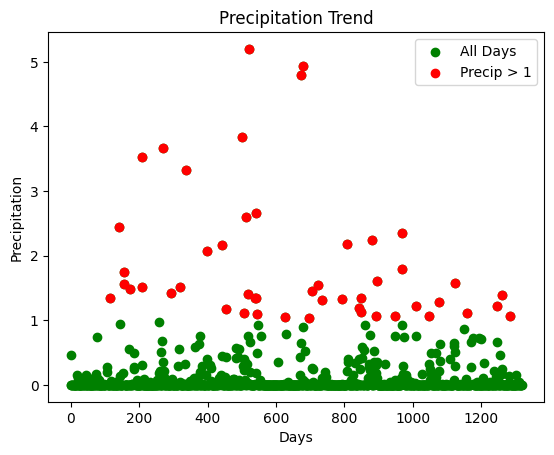

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure Y is numeric (handle 'NA', empty strings, etc.)
Y = pd.to_numeric(Y, errors='coerce')  # Converts non-numeric values to NaN
days = np.array(days)

# Drop NaN values from both days and Y together
mask = ~np.isnan(Y)
Y = Y[mask]
days = days[mask]

# Convert to 1D if needed
Y = np.array(Y).flatten()
days = np.array(days).flatten()

# Option 2: Highlight days where precipitation > 1
days_index = np.where(Y > 1)[0]

# Plotting
print("The precipitation trend")
plt.scatter(days, Y, color='g', label='All Days')
plt.scatter(days[days_index], Y[days_index], color='r', label='Precip > 1')
plt.xlabel('Days')
plt.ylabel('Precipitation')
plt.title('Precipitation Trend')

plt.legend()
plt.show()


The precipitation vs attribute trend


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


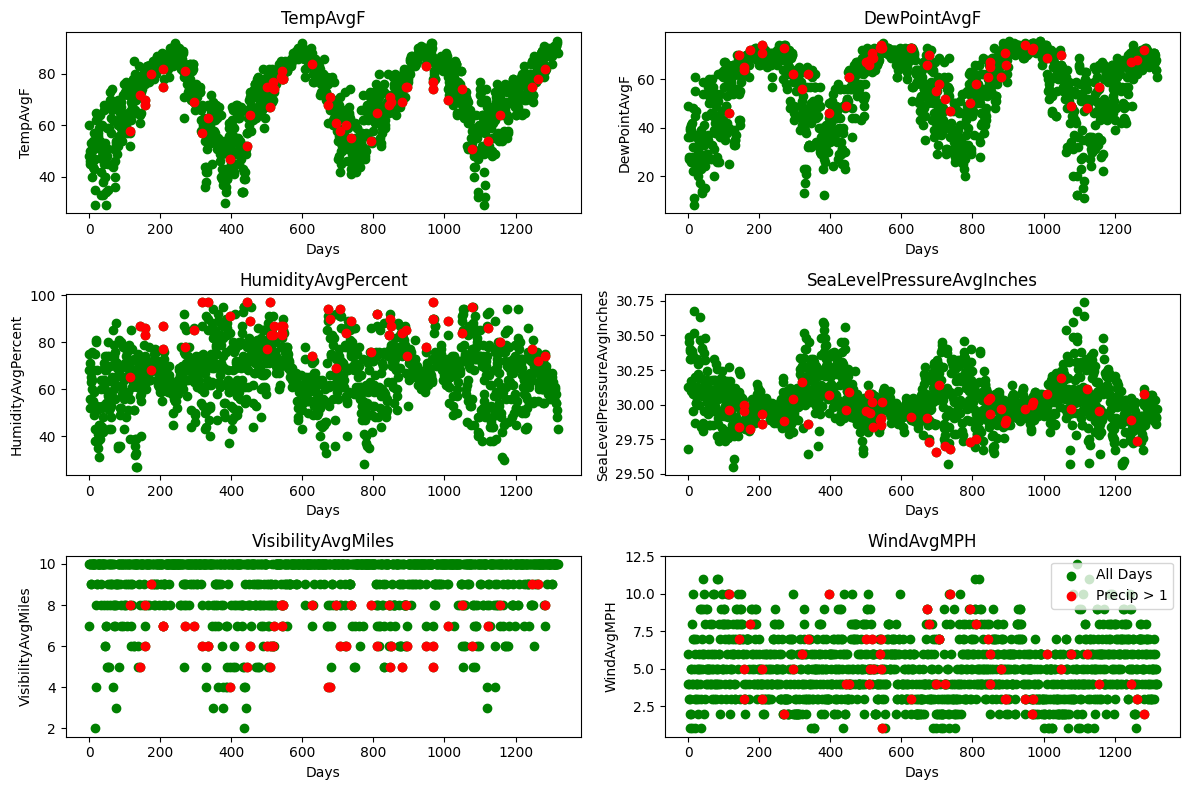

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("The precipitation vs attribute trend")

# Select the columns we want to visualize
columns_to_plot = ["TempAvgF", "DewPointAvgF", "HumidityAvgPercent", 
                   "SeaLevelPressureAvgInches", "VisibilityAvgMiles", "WindAvgMPH"]

# Filter the DataFrame (assumes 'x' is defined)
x_vis = x.filter(columns_to_plot)

# Convert all columns to numeric (handle 'NA', etc.)
x_vis = x_vis.apply(pd.to_numeric, errors='coerce')

# Create a 'days' column from index (or another time-based column, if available)
days = x_vis.index.to_numpy()  # or use: x['DateColumn'].to_numpy() if you have one

# Drop rows with any NaN values to keep everything aligned
mask = ~x_vis.isnull().any(axis=1)
x_vis = x_vis[mask]
days = days[mask]

# Convert to NumPy arrays
x_vis_np = x_vis.to_numpy()

# Define precipitation Y and day_index (replace this with your own logic if needed)
# Here assuming Y is already filtered to match x_vis
Y = pd.to_numeric(data["PrecipitationSumInches"], errors='coerce')
Y = Y[mask]

# Example: Highlight days with precipitation > 1
day_index = np.where(Y > 1)[0]

# Plotting
plt.figure(figsize=(12, 8))
for i in range(x_vis_np.shape[1]):
    plt.subplot(3, 2, i + 1)
    plt.scatter(days, x_vis_np[:, i], color='g', label='All Days')
    plt.scatter(days[day_index], x_vis_np[day_index, i], color='r', label='Precip > 1')
    plt.title(columns_to_plot[i])
    plt.xlabel("Days")
    plt.ylabel(columns_to_plot[i])

plt.tight_layout()
plt.legend()
plt.show()
